In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Dataset description**
- ID - ID of the patient
- A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
- age - Age of the patient in years
- gender - Gender of the patient
- ethnicity - Ethnicity of the patient
- jaundice - Whether the patient had jaundice at the time of birth
- autism - Whether an immediate family member has been diagnosed with autism
- contry_of_res - Country of residence of the patient
- used_app_before - Whether the patient has undergone a screening test before
- result - Score for AQ1-10 screening test
- age_desc - Age of the patient
- relation - Relation of patient who completed the test
- Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [2]:
train_df = pd.read_csv("../input/autismdiagnosis/Autism_Prediction/train.csv")
test_df = pd.read_csv("../input/autismdiagnosis/Autism_Prediction/test.csv")

In [3]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
#Check for Null values in the columns
for col in train_df.columns:
    print(col)
    print(f"Has NA: {train_df[col].isna().sum()}")
    print(f"Has Null: {train_df[col].isnull().sum()}")
    print(f"Col Type:{train_df[col].dtype}")
    #print(f"Distinct values:{train_df[col].unique()}")

ID
Has NA: 0
Has Null: 0
Col Type:int64
A1_Score
Has NA: 0
Has Null: 0
Col Type:int64
A2_Score
Has NA: 0
Has Null: 0
Col Type:int64
A3_Score
Has NA: 0
Has Null: 0
Col Type:int64
A4_Score
Has NA: 0
Has Null: 0
Col Type:int64
A5_Score
Has NA: 0
Has Null: 0
Col Type:int64
A6_Score
Has NA: 0
Has Null: 0
Col Type:int64
A7_Score
Has NA: 0
Has Null: 0
Col Type:int64
A8_Score
Has NA: 0
Has Null: 0
Col Type:int64
A9_Score
Has NA: 0
Has Null: 0
Col Type:int64
A10_Score
Has NA: 0
Has Null: 0
Col Type:int64
age
Has NA: 0
Has Null: 0
Col Type:float64
gender
Has NA: 0
Has Null: 0
Col Type:object
ethnicity
Has NA: 0
Has Null: 0
Col Type:object
jaundice
Has NA: 0
Has Null: 0
Col Type:object
austim
Has NA: 0
Has Null: 0
Col Type:object
contry_of_res
Has NA: 0
Has Null: 0
Col Type:object
used_app_before
Has NA: 0
Has Null: 0
Col Type:object
result
Has NA: 0
Has Null: 0
Col Type:float64
age_desc
Has NA: 0
Has Null: 0
Col Type:object
relation
Has NA: 0
Has Null: 0
Col Type:object
Class/ASD
Has NA: 0
Has N

In [5]:
cat_col = []
num_col = []

In [6]:
for x in train_df.columns:
    if (train_df.dtypes[x] =='object' or 'Score' in x):
        cat_col.append(x)
    else:
        num_col.append(x)

In [7]:
print(f'categorical columns:{cat_col}')
print(f'numerical columns:{num_col}')

categorical columns:['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
numerical columns:['ID', 'age', 'result', 'Class/ASD']


We have only 2 numeric columns: age and result. Rest will be considered categorical. Score columns are also binary categories.

<AxesSubplot:xlabel='age', ylabel='Count'>

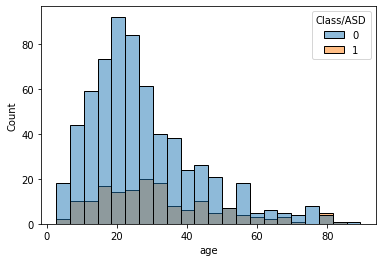

In [8]:
# find how many people of a certain age have autisim
sns.histplot(data=train_df, x="age", hue="Class/ASD")

<AxesSubplot:xlabel='Class/ASD', ylabel='age'>

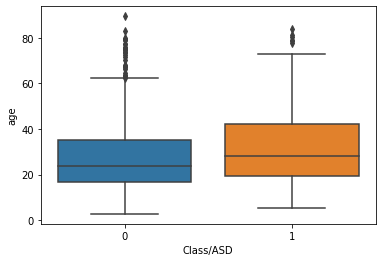

In [9]:
sns.boxplot(y=train_df["age"],x=train_df["Class/ASD"])

# Inference:
1. Median age of people who have autism is more than those who don't.
2. There lot many people who don't have autism in an age range. Doesn't look qualified field.

<AxesSubplot:xlabel='Class/ASD', ylabel='result'>

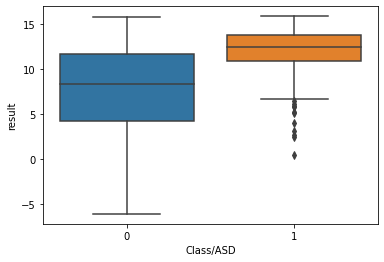

In [10]:
sns.boxplot(y=train_df["result"],x=train_df["Class/ASD"])

<AxesSubplot:xlabel='result', ylabel='Count'>

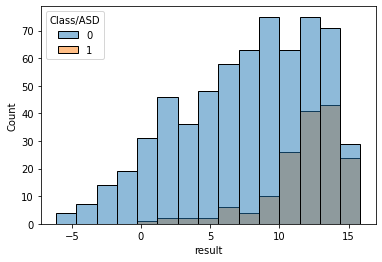

In [11]:
sns.histplot(data=train_df, x="result", hue="Class/ASD")

# Inference:
There is a very little overlap in the result of people who have autism vs who don't so result can be a good criterion for the model.

In [12]:
# update ethnicity/relation column
train_df['ethnicity'] = np.where((train_df.ethnicity =='?')|(train_df.ethnicity =='others'),'Others',train_df.ethnicity)
test_df['ethnicity'] = np.where((test_df.ethnicity =='?')|(test_df.ethnicity =='others'),'Others',test_df.ethnicity)
train_df['relation'] = np.where((train_df.relation =='?'),'Others',train_df.relation)
test_df['relation'] = np.where((test_df.relation =='?'),'Others',test_df.relation)

In [13]:
#print(np.unique(df[['LastName', 'FirstName']].values))
print(f"Ethnicity unique values:{train_df['ethnicity'].unique()}")
print(f"Ethnicity unique values:{test_df['ethnicity'].unique()}")
print(f"Relation unique values: {train_df['relation'].unique()}")
print(f"Relation unique values: {test_df['relation'].unique()}")

Ethnicity unique values:['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']
Ethnicity unique values:['White-European' 'Asian' 'Others' 'Middle Eastern ' 'South Asian'
 'Pasifika' 'Turkish' 'Latino' 'Black' 'Hispanic']
Relation unique values: ['Self' 'Relative' 'Parent' 'Others' 'Health care professional']
Relation unique values: ['Self' 'Parent' 'Others' 'Relative' 'Health care professional']


In [14]:
#removing age description column
train_df.drop('age_desc',axis=1,inplace=True)
test_df.drop('age_desc',axis=1,inplace=True)

In [15]:
#removing relation column
train_df.drop('relation',axis=1,inplace=True)
test_df.drop('relation',axis=1,inplace=True)

In [16]:
# compare categorical columns vs target 
#'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 
#'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jaundice', 'austim', 
#'contry_of_res', 'used_app_before', 'age_desc', 'relation'
# x_vars=["gender", "ethnicity", "jaundice", "austim"]
#sns.set_theme(style="whitegrid")
# with sns.axes_style("dark"):
#     g = sns.PairGrid(train_df,
 #                x_vars=x_vars,
 #                height=5, aspect=.5)
  #  g.map(sns.countplot, palette="Blues_d")#color = "xkcd:Blues_d")
   # for axis in g.fig.axes:   # get all the axis
   #     axis.set_xticklabels(axis.get_xticklabels(), rotation = 90)
    #ax.set_xticklabels(rotation=40, ha="right")
    #plt.xticks(rotation=45)
  #  g.set(ylim=(0, 1))
   # sns.despine(fig=g.fig, left=True)


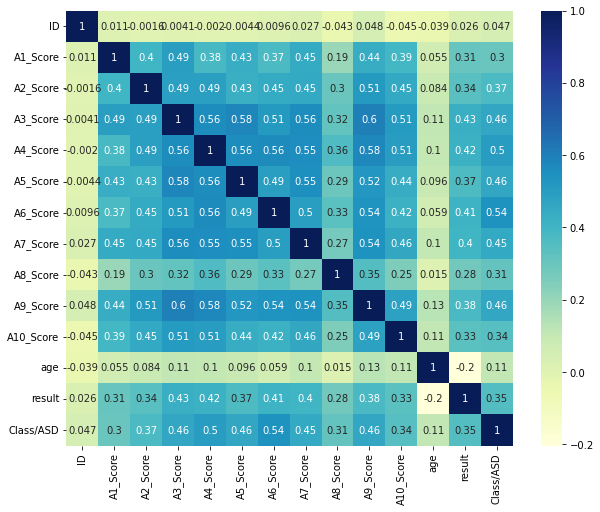

In [17]:
corr = train_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

In [18]:
# getting count of records for each country
train_df.groupby(train_df['contry_of_res']).size().reset_index(name='ID').sort_values(['ID'], ascending=False)

,contry_of_res,ID
54,United States,134
25,India,108
36,New Zealand,78
53,United Kingdom,67
31,Jordan,55
52,United Arab Emirates,40
6,Australia,37
15,Canada,30
0,Afghanistan,22
35,Netherlands,20
